In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder




In [2]:
# Load the dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [3]:
# Map numeric target to species names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [7]:
# Calculate Z-scores
z_scores = np.abs(zscore(iris_df.iloc[:, :-1]))  # Ignoring the species column
outliers = (z_scores > 3)  # True for values that are outliers

# Display rows that are outliers
outlier_rows = iris_df[outliers.any(axis=1)]
print(outlier_rows)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   

   species  
15  Setosa  


In [8]:
iris_df = iris_df.drop(index=15)

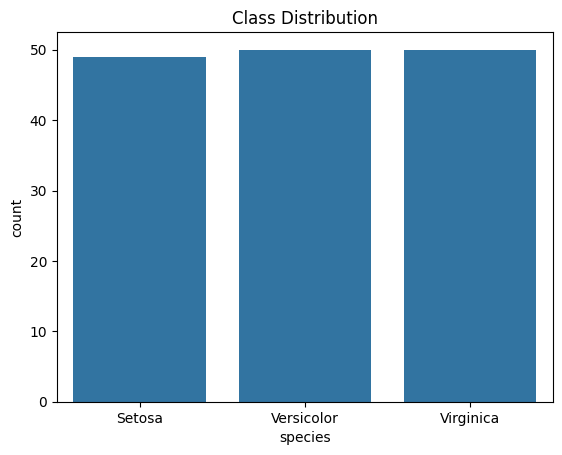

In [9]:
sns.countplot(x='species', data=iris_df)
plt.title('Class Distribution')
plt.show()

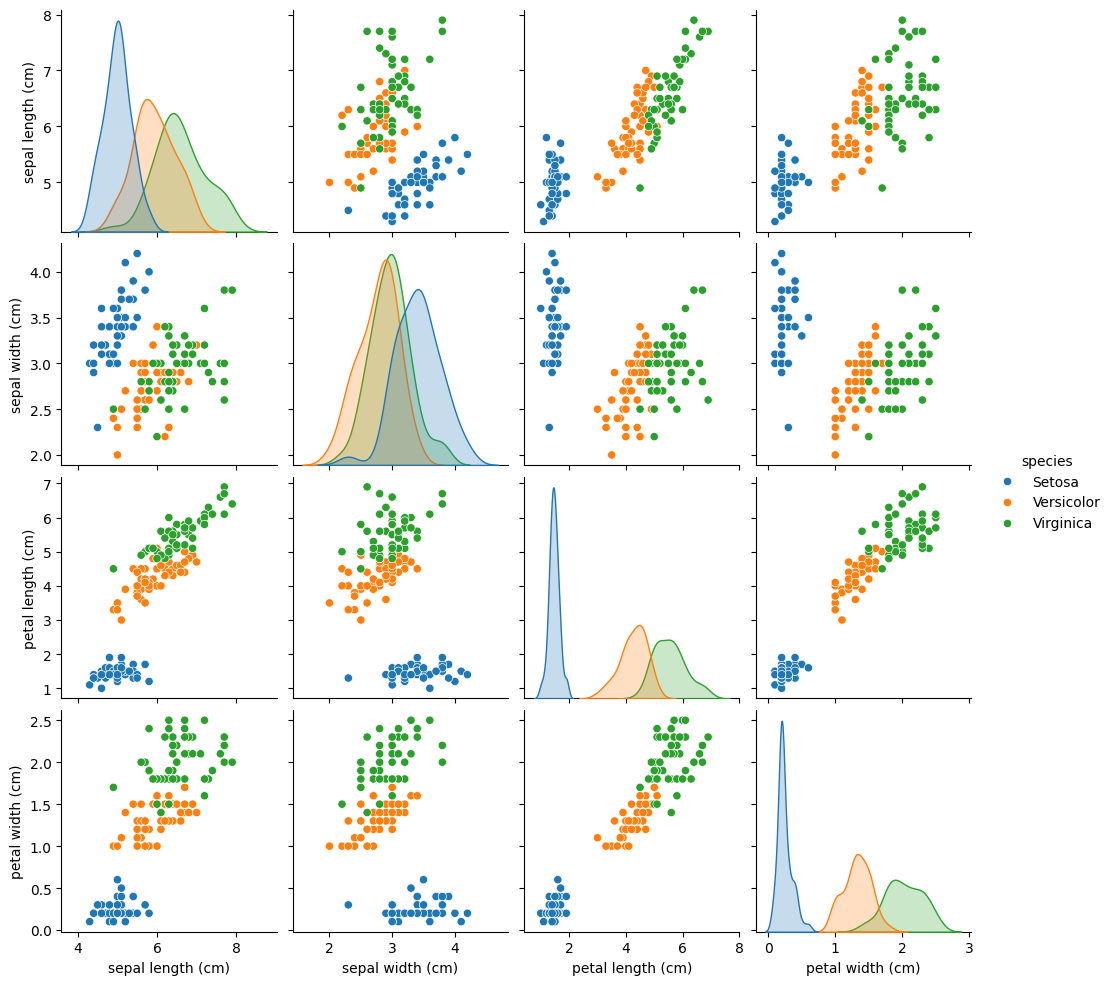

In [10]:
# Pairplot for feature relationships
sns.pairplot(iris_df, hue='species')
plt.show()

In [11]:
# Separate features and target
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
accuracy_scores = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.2f}')

Accuracy for k=1: 0.93
Accuracy for k=2: 0.93
Accuracy for k=3: 0.93
Accuracy for k=4: 0.93
Accuracy for k=5: 0.93
Accuracy for k=6: 0.97
Accuracy for k=7: 0.97
Accuracy for k=8: 0.97
Accuracy for k=9: 0.97
Accuracy for k=10: 0.97
Accuracy for k=11: 0.97
Accuracy for k=12: 0.97
Accuracy for k=13: 0.97
Accuracy for k=14: 0.97


In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train[:, 2:4], y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.91666667 0.95833333 0.95833333 1.         1.        ]
Average CV Score: 0.9666666666666668


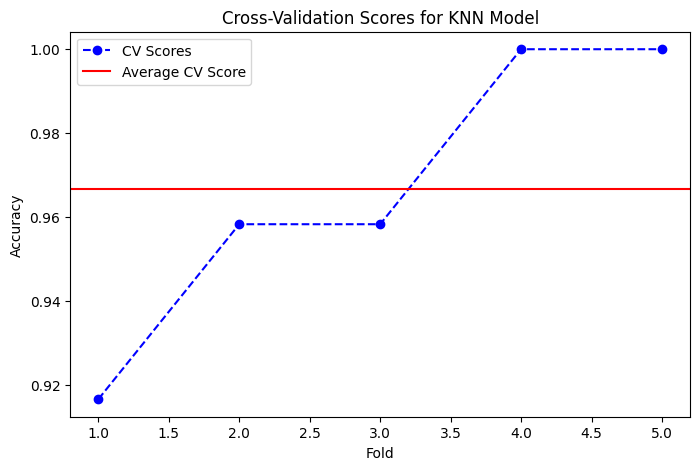

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b', label="CV Scores")
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-', label="Average CV Score")
plt.title('Cross-Validation Scores for KNN Model')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

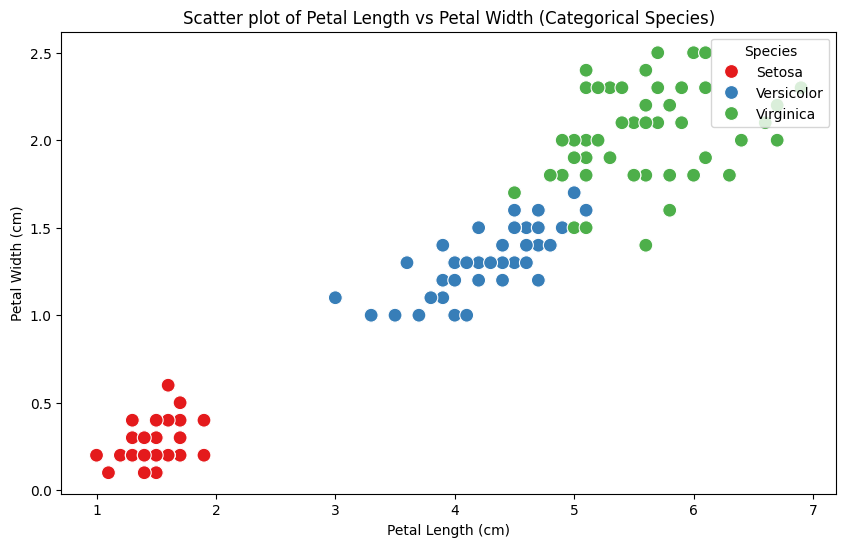

In [16]:
# Plotting using seaborn with categorical colors for the 'species' column directly
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'],
                hue=iris_df['species'], palette='Set1', s=100)
plt.title('Scatter plot of Petal Length vs Petal Width (Categorical Species)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species', loc='upper right')
plt.show()
